# Проверка статистических гипотез: последовательный критерий Вальда

Для начала импортируем все необходимые для анализа библиотеки:

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline
import math


Пусть в результате экспериментов наблюдаются значения случайной величины: $x_1 , x_2, …,$ которые являются независимыми и одинаково распределенными. Эксперименты продолжаются до тех пор, пока не будет принято решение о виде распределения случайной величины. Объем выборки заранее не известен и определяется в процессе последовательной процедуры.<br>

Пусть основная гипотеза о виде распределения случайной величины имеет вид $H_0: f(x) = f_0(x, \theta),$ где $f(x)$ - функция плотности, а $\theta$ - известный в случае простой и неизвестный в случае сложной гипотезы параметр распределения. Конкурирующая гипотеза имеет вид $H_1: f(x) = f_1(x, \theta)$. При проверке сложной гипотезы оценка параметра $\hat \theta$ вычисляется по той же выборке, по которой проверяется гипотеза.

Последовательный критерий отношения правдоподобия строится сле-
дующим образом: сначала выбирают критические границы $c_0$ и $c_1$ ($c_0$ < $c_1$). После наблюдения $x_1$ вычисляют значение статистики критерия:

$$
\lambda_1 = ln\begin{pmatrix}\frac{L_1(X_1)}{L_0(X_1)}\end{pmatrix} = ln\begin{pmatrix}\frac{f_1(x_1)}{f_0(x_1)}\end{pmatrix} = ln(f_1(x_1)) - ln(f_0(x_1)),
$$

где $L_0$ - функция правдоподобия при законе, соответствующем гипотезе $H_0$, $L_1$ - при законе, соответствующем гипотезе $H_1$.

Если $\lambda_1 < c_0$, то принимают гипотезу $H_0$; если $\lambda_1 > c_1$, то принимают гипотезу $H_1$; если $c_0 < \lambda_1 < c_1$, то производят второе наблюдение $x_2$ и также исследуют величину:

$$
\lambda_1 = ln\begin{pmatrix}\frac{L_1(X_2)}{L_0(X_2)}\end{pmatrix} = ln\begin{pmatrix}\frac{f_1(x_1)f_1(x_2)}{f_0(x_1)f_0(x_2)}\end{pmatrix} = ln(f_1(x_1)f_1(x_2)) - ln(f_0(x_1)f_0(x_2)) = ln(f_1(x_1)) - ln(f_0(x_1)) + ln(f_1(x_2)) - ln(f_0(x_2)).
$$

С вероятностью, равной единице, процесс оканчивается либо выбором $H_0$, либо $H_1$, т.е. на каком-то шаге $n$ статистика

$$
\lambda_n = ln\begin{pmatrix}\frac{L_1(X_n)}{L_0(X_n)}\end{pmatrix} = \sum\limits_{i=1}^n [ln(f_1(x_i)) - ln(f_0(x_i))],
$$

выйдет за интервал $(c_0,\ c_1)$.

Отсюда первое, что можно определить, это функцию вида:

In [3]:
def lambda_stat(pdf_1, pdf_0):
    return math.log(pdf_1) - math.log(pdf_0)

Величины $c_0$ и $c_1$ определяются из условия, чтобы вероятности ошибок первого и второго рода имели заданные значения $\alpha$ и $\beta$. 

**Теорема:** *Критические значения $c_0$ и $c_1$ критерия Вальда удовлетворяют условиям:*

$$c_0 \geq ln\begin{pmatrix}\frac{\beta}{1 - \alpha}\end{pmatrix}, \ c_1 \leq ln\begin{pmatrix}\frac{1 - \beta}{\alpha}\end{pmatrix}.$$

В критерии Вальда критические границы неизвестны, поэтому на практике используют оценки этих границ, которые в явном виде зависят от вероятностей ошибок первого и второго рода. 

In [4]:
def c0(alpha, beta):
    return math.log(beta/(1 - alpha))

def c1(alpha, beta):
    return math.log((1 - beta)/alpha)

def vald_criterion(rv_1, rv_0, c_0, c_1, sample):
    lambda_n = 0
    i = 0
    while lambda_n >= c_0 and lambda_n <= c_1 and i <= len(sample):
        lambda_n += lambda_stat(rv_1.pdf(sample[i]), rv_0.pdf(sample[i]))
        i += 1
    return (lambda_n, i - 1)

Далее необходимо сгенерировать выборки объема $n$ из нормальных распределений $N(\mu_0, \ \sigma), \ N(\mu_1, \ \sigma)$, где $\sigma$ известно, а $\mu_0, \ \mu_1$ - задаваемые параметры:

In [5]:
n = 10000

sigma = 5

mu_0 = 2

mu_1 = 1

rv_0 = norm(loc=mu_0, scale=sigma)
rv_1 = norm(loc=mu_1, scale=sigma)

Для моделирования будем использовать значения $\alpha$ и $\beta$, равные 0.02 и 0.03 соответственно:

In [6]:
alpha = 0.01
beta = 0.01

Теперь необходимо проводить процедуру накапливания значения $\lambda_n$ до тех пор пока ее значение не выйдет за границы интервала $(c_0, \ c_1)$:

In [7]:
def genearateMeans_0(alpha, beta):
    array = [vald_criterion(rv_1, rv_0, c0(alpha, beta), c1(alpha, beta), rv_0.rvs(size=n))[1] for i in range(1000)]
    return sum(array)/len(array)
def genearateMeans_1(alpha, beta):
    array = [vald_criterion(rv_1, rv_0, c0(alpha, beta), c1(alpha, beta), rv_1.rvs(size=n))[1] for i in range(1000)]
    return sum(array)/len(array)

In [10]:
%%time
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
betas = [0.01, 0.02, 0.03, 0.04, 0.05]

means_0 = [[genearateMeans_0(alpha, beta) for alpha in alphas] for beta in betas]
means_1 = [[genearateMeans_1(alpha, beta) for alpha in alphas] for beta in betas]

Wall time: 20min 12s


Text(768.727,0.5,'Beta')

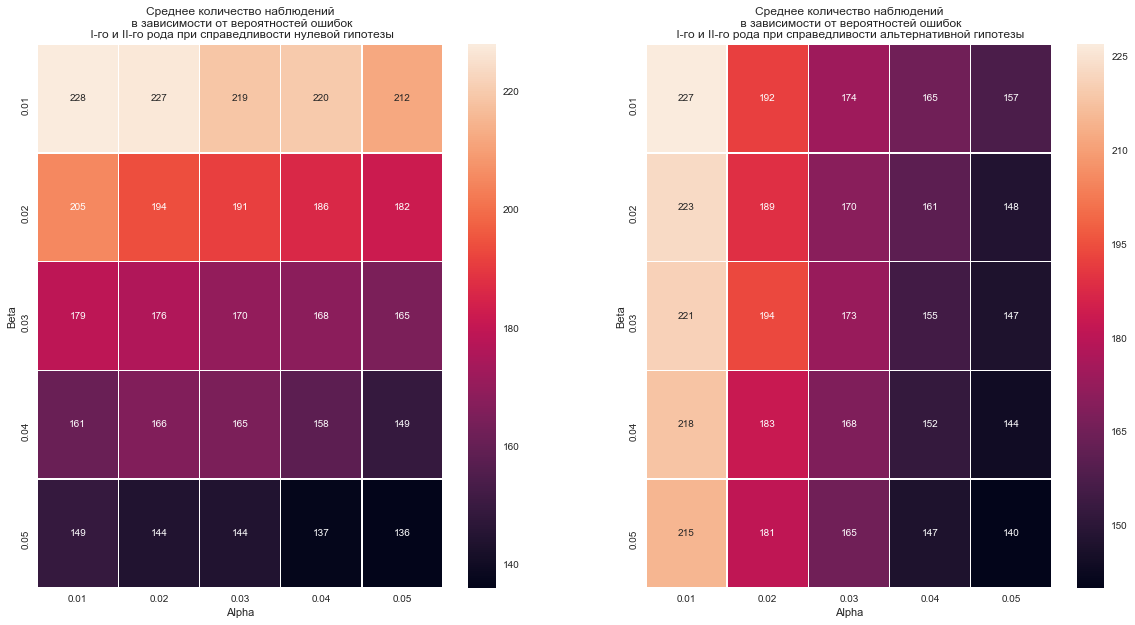

In [11]:
means_0 = list(map(lambda x: list(map(math.ceil, x)), means_0))
means_1 = list(map(lambda x: list(map(math.ceil, x)), means_1))

means_0_df = pd.DataFrame(data=means_0, index=alphas, columns=betas)
means_1_df = pd.DataFrame(data=means_1, index=alphas, columns=betas)

f, axarr = plt.subplots(1, 2, figsize=(20,10))

sns.heatmap(means_0_df, annot=True, fmt="d", linewidths=.5, ax=axarr[0])
axarr[0].set_title("Среднее количество наблюдений\n в зависимости от вероятностей ошибок\n I-го и II-го рода при справедливости нулевой гипотезы")
axarr[0].set_xlabel("Alpha")
axarr[0].set_ylabel("Beta")

sns.heatmap(means_1_df, annot=True, fmt="d", linewidths=.5, ax=axarr[1])
axarr[1].set_title("Среднее количество наблюдений\n в зависимости от вероятностей ошибок\n I-го и II-го рода при справедливости альтернативной гипотезы")
axarr[1].set_xlabel("Alpha")
axarr[1].set_ylabel("Beta")